In [1]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('../../Dataset/Gold.csv')
df.shape

(1694, 5)

In [3]:
# Kiểm tra cột close có hàng nào null không
df['Close'].isnull().sum()

0

In [4]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

# Sắp xếp lại index
df = df.sort_index(ascending=True)
df = df.drop(columns=['Open', 'High', 'Low'])
df

,Close
Date,
2019-03-01,1292.765
2019-03-02,1292.765
2019-03-03,1292.765
2019-03-04,1286.710
2019-03-05,1287.775
...,...
2024-03-22,2165.400
2024-03-23,2165.400
2024-03-24,2165.990


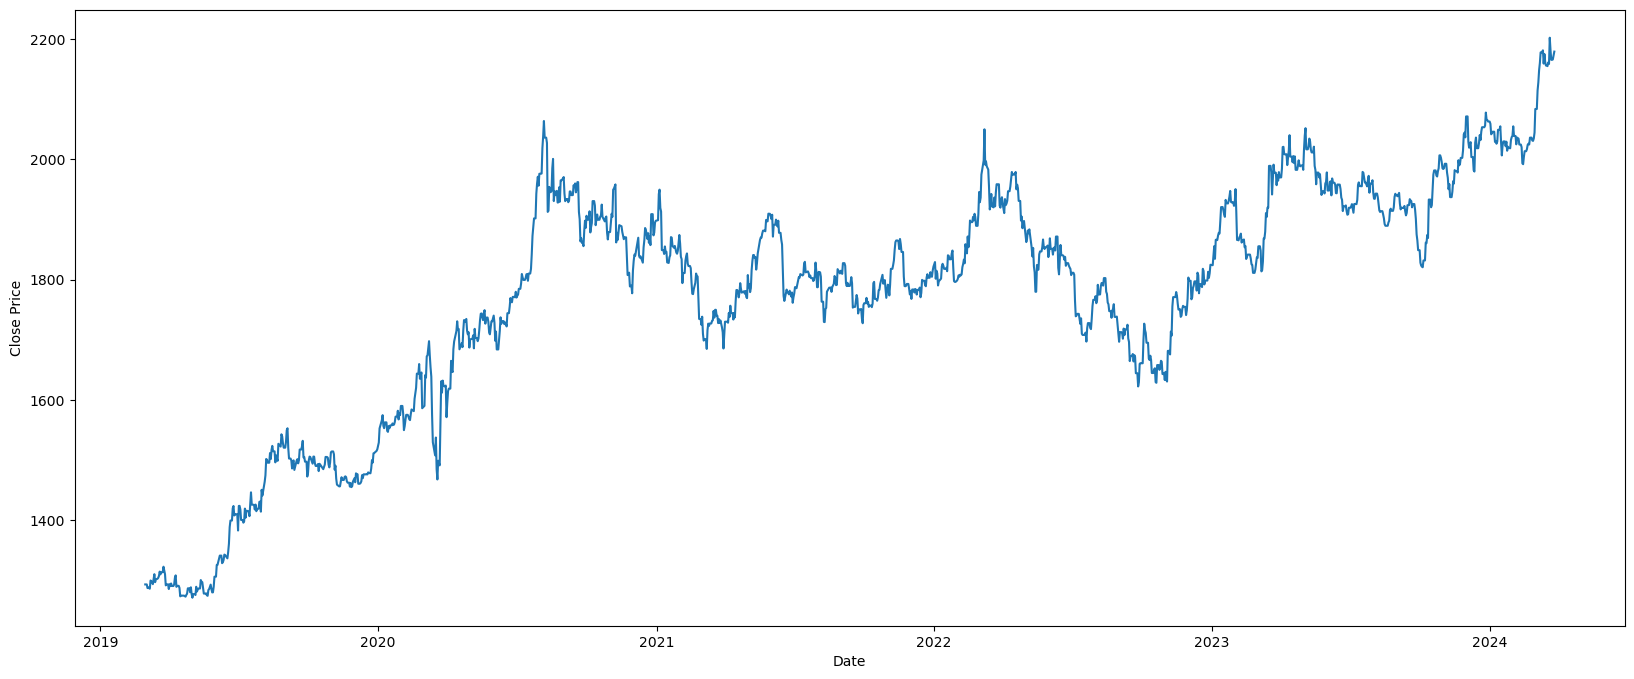

In [5]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [6]:
# Số lượng ngày trước đó
steps = 20

# Tạo một DataFrame mới để lưu trữ dữ liệu
df_shift = df.copy()

# Thêm cột chứa giá trị 'Close' của 20 ngày trước đó
for i in range(steps):
    df_shift[f'Close_t-{i+1}'] = df['Close'].shift(i+1)

# Loại bỏ các hàng có giá trị null
df_shift = df_shift.dropna()

In [7]:
df_shift.head(30)

,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,Close_t-9,...,Close_t-11,Close_t-12,Close_t-13,Close_t-14,Close_t-15,Close_t-16,Close_t-17,Close_t-18,Close_t-19,Close_t-20
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-24,1313.050,1313.225,1309.505,1314.105,1306.710,1303.505,1302.105,1301.375,1296.505,1309.800,...,1293.210,1296.710,1299.275,1285.660,1286.570,1287.775,1286.710,1292.765,1292.765,1292.765
2019-03-25,1322.210,1313.050,1313.225,1309.505,1314.105,1306.710,1303.505,1302.105,1301.375,1296.505,...,1301.050,1293.210,1296.710,1299.275,1285.660,1286.570,1287.775,1286.710,1292.765,1292.765
2019-03-26,1316.355,1322.210,1313.050,1313.225,1309.505,1314.105,1306.710,1303.505,1302.105,1301.375,...,1309.800,1301.050,1293.210,1296.710,1299.275,1285.660,1286.570,1287.775,1286.710,1292.765
2019-03-27,1309.755,1316.355,1322.210,1313.050,1313.225,1309.505,1314.105,1306.710,1303.505,1302.105,...,1296.505,1309.800,1301.050,1293.210,1296.710,1299.275,1285.660,1286.570,1287.775,1286.710
2019-03-28,1291.200,1309.755,1316.355,1322.210,1313.050,1313.225,1309.505,1314.105,1306.710,1303.505,...,1301.375,1296.505,1309.800,1301.050,1293.210,1296.710,1299.275,1285.660,1286.570,1287.775
2019-03-29,1292.860,1291.200,1309.755,1316.355,1322.210,1313.050,1313.225,1309.505,1314.105,1306.710,...,1302.105,1301.375,1296.505,1309.800,1301.050,1293.210,1296.710,1299.275,1285.660,1286.570
2019-03-31,1292.860,1292.860,1291.200,1309.755,1316.355,1322.210,1313.050,1313.225,1309.505,1314.105,...,1303.505,1302.105,1301.375,1296.505,1309.800,1301.050,1293.210,1296.710,1299.275,1285.660
2019-04-01,1285.150,1292.860,1292.860,1291.200,1309.755,1316.355,1322.210,1313.050,1313.225,1309.505,...,1306.710,1303.505,1302.105,1301.375,1296.505,1309.800,1301.050,1293.210,1296.710,1299.275
2019-04-02,1293.150,1285.150,1292.860,1292.860,1291.200,1309.755,1316.355,1322.210,1313.050,1313.225,...,1314.105,1306.710,1303.505,1302.105,1301.375,1296.505,1309.800,1301.050,1293.210,1296.710


In [8]:
# Chia train test theo tỉ lệ
train_size = int(0.6 * len(df_shift))
test_size = len(df_shift) - train_size

train_data = df_shift[:train_size]
test_data = df_shift[train_size:]

In [9]:
# Chia các tập x,y train, test tương ứng
x_train = train_data.iloc[:, 1:]
y_train = train_data['Close']

x_test = test_data.iloc[:, 1:]
y_test = test_data['Close']

In [10]:
# Các tham số để tối ưu
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Tạo model mẫu
rf = RandomForestRegressor()

# Tìm các tham số tốt nhất
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit model mẫu
grid_search.fit(x_train, y_train)

# In ra các tham số tốt nhất cho mô hình
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [11]:
# Quá trình training
# Fit mô hình với các tham số tốt nhất được tìm kiếm
model = RandomForestRegressor( n_estimators = grid_search.best_params_['n_estimators'], 
                               max_depth = grid_search.best_params_['max_depth'], 
                               min_samples_split = grid_search.best_params_['min_samples_split'],
                               min_samples_leaf = grid_search.best_params_['min_samples_leaf'])

# Fit model
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=15)

In [12]:
# Quá trình testing 
y_pred = model.predict(x_test)

In [13]:
# Tính MSE - Mean Squared Error - Sai số bình phương trung bình
test_mse = mean_squared_error(y_test, y_pred) 
print('Testing MSE:', test_mse)

# Tính RMSE - Root Mean Squared Error - Sai số bình phương trung bình
test_rmse = math.sqrt(test_mse)
print('Testing RMSE:', test_rmse)

# Tính MAPE - Mean Absolute Percentage Error - Tỷ lệ phần trăm sai số tuyệt đối trung bình
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing MSE: 2997.5155489503973
Testing RMSE: 54.74957122161229
Testing MAPE: 0.01600726728825511


In [14]:
# Tạo hàm dự đoán
def predict_future(model, df_shift, predict_days, steps):
    df_predict = df_shift.copy()
    for i in range(predict_days):
        new_row = {}
        # Tạo dòng mới với close là nan
        date = df_predict.index[-1] + pd.DateOffset(days=1)
        new_row['Close'] = np.nan
        
        # Gán các giá trị t-1 đến t-20
        for j in range(steps):
            new_row[f'Close_t-{j+1}'] = df_predict['Close'].iloc[-j -1]
    
        # Thêm dòng mới vào df
        df_predict.loc[date] = new_row
    
        # Dự đoán cho giá trị tiếp theo
        x_next = df_predict.iloc[-1, 1:].to_frame().T
        y_next = model.predict(x_next)
        df_predict.at[df_predict.index[-1], 'Close'] = y_next[0]
    return df_predict

Giá Close dự đoán:
Date
2024-03-27    1954.179000
2024-03-28    1947.885400
2024-03-29    1948.783500
2024-03-30    1949.208286
2024-03-31    1947.337500
2024-04-01    1947.349586
2024-04-02    1948.782586
2024-04-03    1949.912886
2024-04-04    1947.408200
2024-04-05    1947.253386
2024-04-06    1948.631386
2024-04-07    1943.587986
2024-04-08    1937.913268
2024-04-09    1938.323082
2024-04-10    1939.501268
2024-04-11    1939.831090
2024-04-12    1937.672049
2024-04-13    1943.093077
2024-04-14    1943.814863
2024-04-15    1945.689515
2024-04-16    1948.697553
2024-04-17    1949.615722
2024-04-18    1950.821628
2024-04-19    1950.033048
2024-04-20    1951.711648
2024-04-21    1950.642420
2024-04-22    1947.350555
2024-04-23    1944.501639
2024-04-24    1942.913593
2024-04-25    1939.440877
Name: Close, dtype: float64


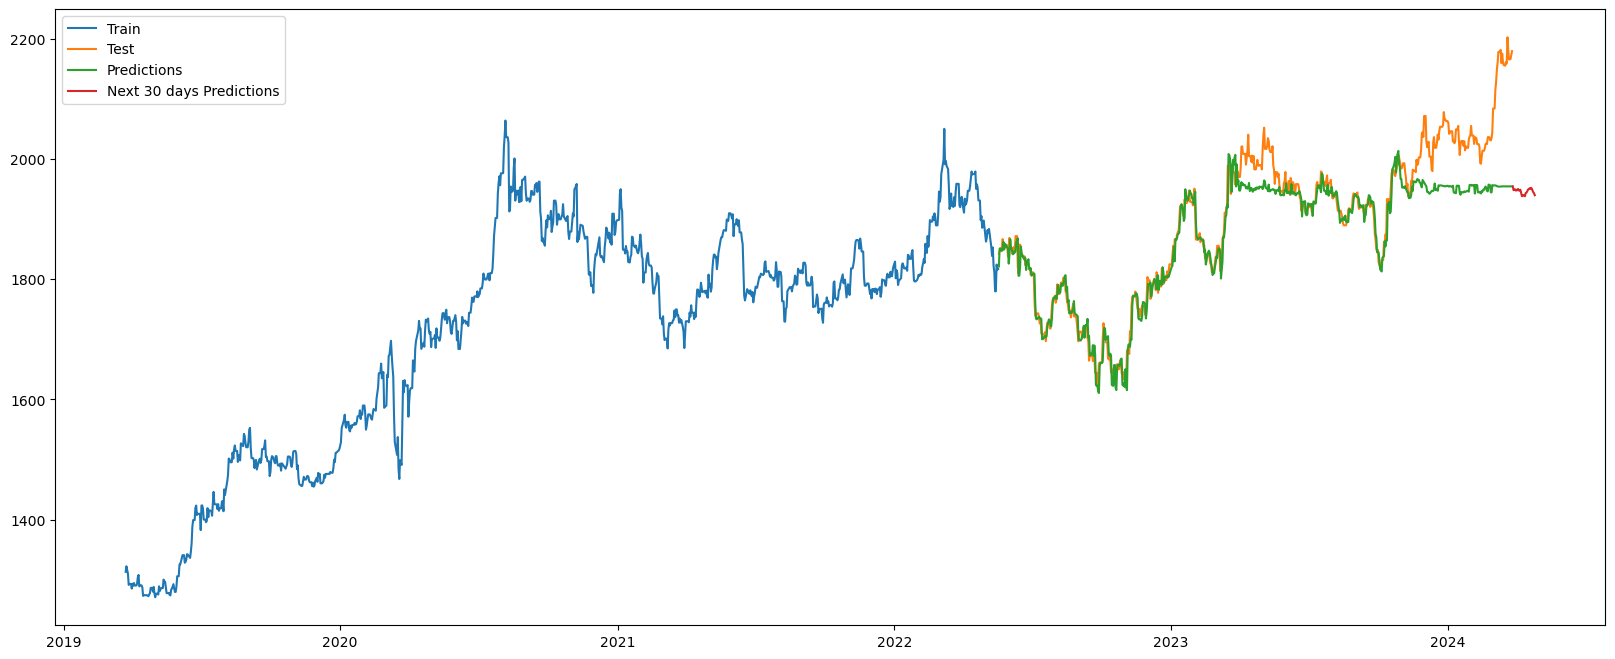

In [15]:
# Dự đoán 30 ngày tiếp theo
predict_days = 30

# Lấy predict_data và y_pred_next
df_predict = predict_future(model, df_shift, predict_days, steps)
predict_data = df_predict.tail(predict_days)
y_pred_next = predict_data['Close']

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_pred_next)

# Vẽ hình
plt.plot(train_data.index, y_train)
plt.plot(test_data.index, y_test)
plt.plot(test_data.index, y_pred)
plt.plot(predict_data.index, y_pred_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 30 days Predictions'])
plt.show()

Giá Close dự đoán:
Date
2024-03-27    1954.179000
2024-03-28    1947.885400
2024-03-29    1948.783500
2024-03-30    1949.208286
2024-03-31    1947.337500
2024-04-01    1947.349586
2024-04-02    1948.782586
2024-04-03    1949.912886
2024-04-04    1947.408200
2024-04-05    1947.253386
2024-04-06    1948.631386
2024-04-07    1943.587986
2024-04-08    1937.913268
2024-04-09    1938.323082
2024-04-10    1939.501268
2024-04-11    1939.831090
2024-04-12    1937.672049
2024-04-13    1943.093077
2024-04-14    1943.814863
2024-04-15    1945.689515
2024-04-16    1948.697553
2024-04-17    1949.615722
2024-04-18    1950.821628
2024-04-19    1950.033048
2024-04-20    1951.711648
2024-04-21    1950.642420
2024-04-22    1947.350555
2024-04-23    1944.501639
2024-04-24    1942.913593
2024-04-25    1939.440877
2024-04-26    1941.560219
2024-04-27    1936.905903
2024-04-28    1936.517046
2024-04-29    1938.735588
2024-04-30    1942.160307
2024-05-01    1943.236382
2024-05-02    1945.360864
2024-05-03    

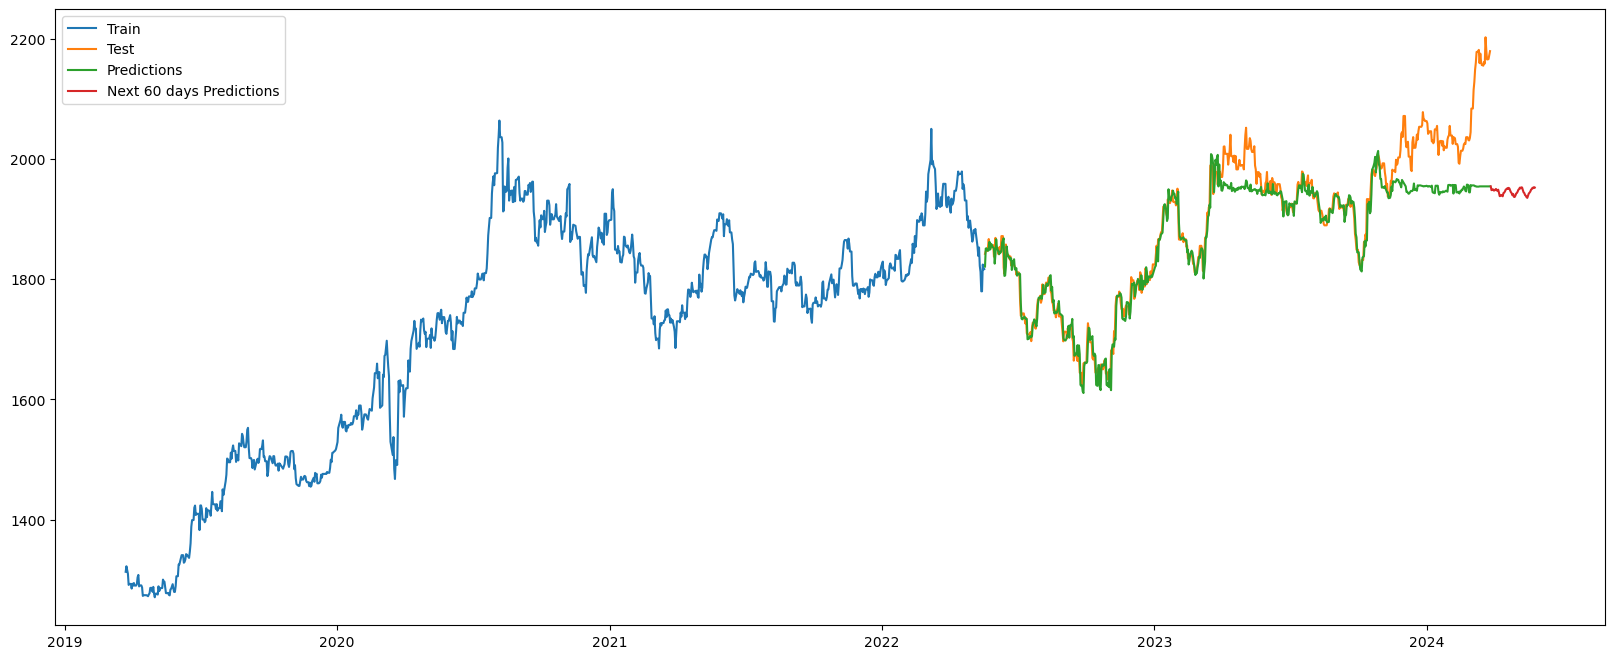

In [16]:
# Dự đoán 60 ngày tiếp theo
predict_days = 60

# Lấy predict_data và y_pred_next
df_predict = predict_future(model, df_shift, predict_days, steps)
predict_data = df_predict.tail(predict_days)
y_pred_next = predict_data['Close']

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_pred_next)

# Vẽ hình
plt.plot(train_data.index, y_train)
plt.plot(test_data.index, y_test)
plt.plot(test_data.index, y_pred)
plt.plot(predict_data.index, y_pred_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 60 days Predictions'])
plt.show()

Giá Close dự đoán:
Date
2024-03-27    1954.179000
2024-03-28    1947.885400
2024-03-29    1948.783500
2024-03-30    1949.208286
2024-03-31    1947.337500
                 ...     
2024-06-20    1942.432657
2024-06-21    1943.819882
2024-06-22    1945.012036
2024-06-23    1948.612320
2024-06-24    1949.854197
Name: Close, Length: 90, dtype: float64


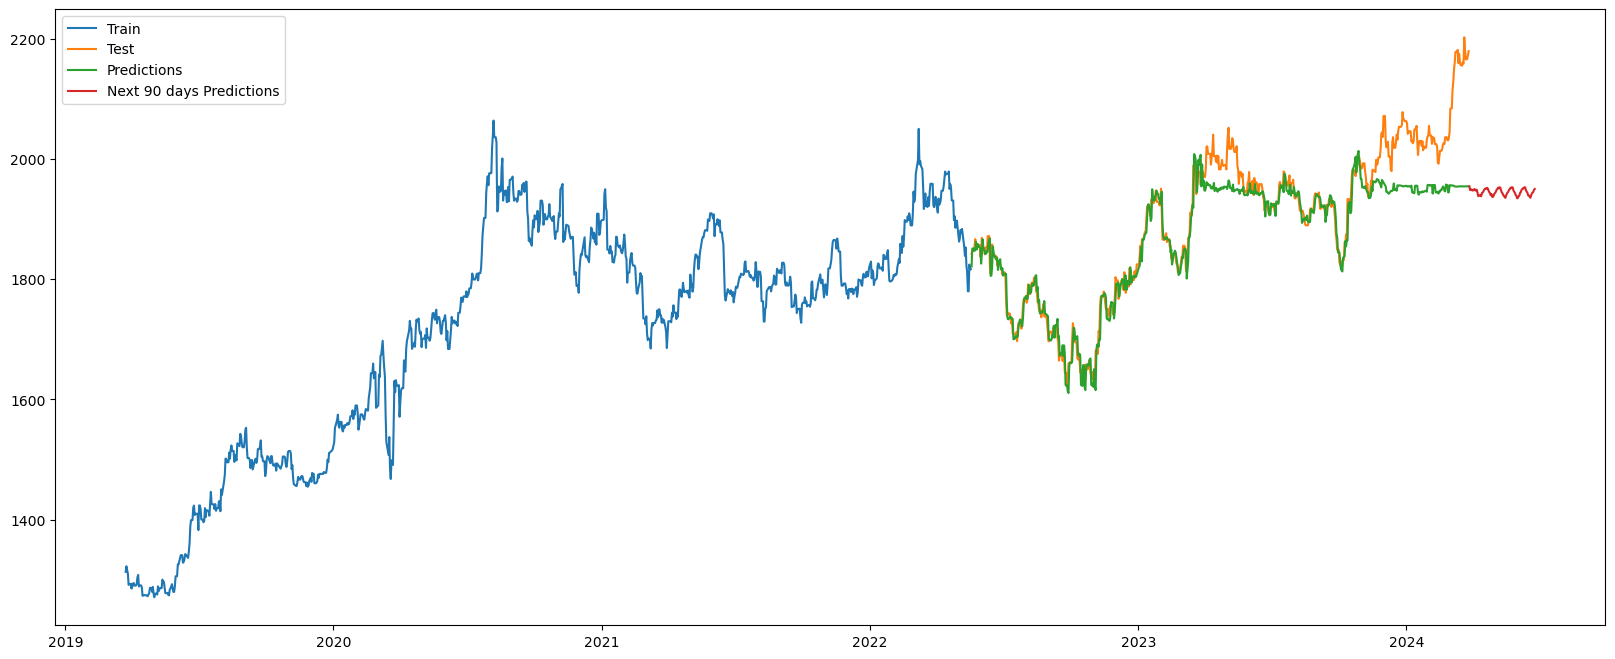

In [17]:
# Dự đoán 90 ngày tiếp theo
predict_days = 90

# Lấy predict_data và y_pred_next
df_predict = predict_future(model, df_shift, predict_days, steps)
predict_data = df_predict.tail(predict_days)
y_pred_next = predict_data['Close']

# In ra dữ liệu dự đoán
print('Giá Close dự đoán:')
print(y_pred_next)

# Vẽ hình
plt.plot(train_data.index, y_train)
plt.plot(test_data.index, y_test)
plt.plot(test_data.index, y_pred)
plt.plot(predict_data.index, y_pred_next)
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions'])
plt.show()